<a href="https://colab.research.google.com/github/FajarWahyuSuryaputra/Pembelajaran_Mesin/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
df = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
df = df[df['Name'] == 'AAPL']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [47]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

In [48]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

In [49]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#### LSTM

In [50]:
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
print("\nTraining LSTM Model...")
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Training LSTM Model...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0126 - val_loss: 0.0020
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0012 - val_loss: 6.6098e-04
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 8.4845e-04 - val_loss: 5.1084e-04
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 7.7876e-04 - val_loss: 6.7071e-04
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 7.4276e-04 - val_loss: 6.9187e-04
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 7.5153e-04 - val_loss: 4.9938e-04
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 8.1365e-04 - val_loss: 5.9423e-04
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 6.3850e-04 - val_loss: 5.2862e-04
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 6.4345e-04 - val_loss: 6.8676e-04


In [53]:
predicted_lstm = model_lstm.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [54]:
predicted_lstm_prices = scaler.inverse_transform(predicted_lstm)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

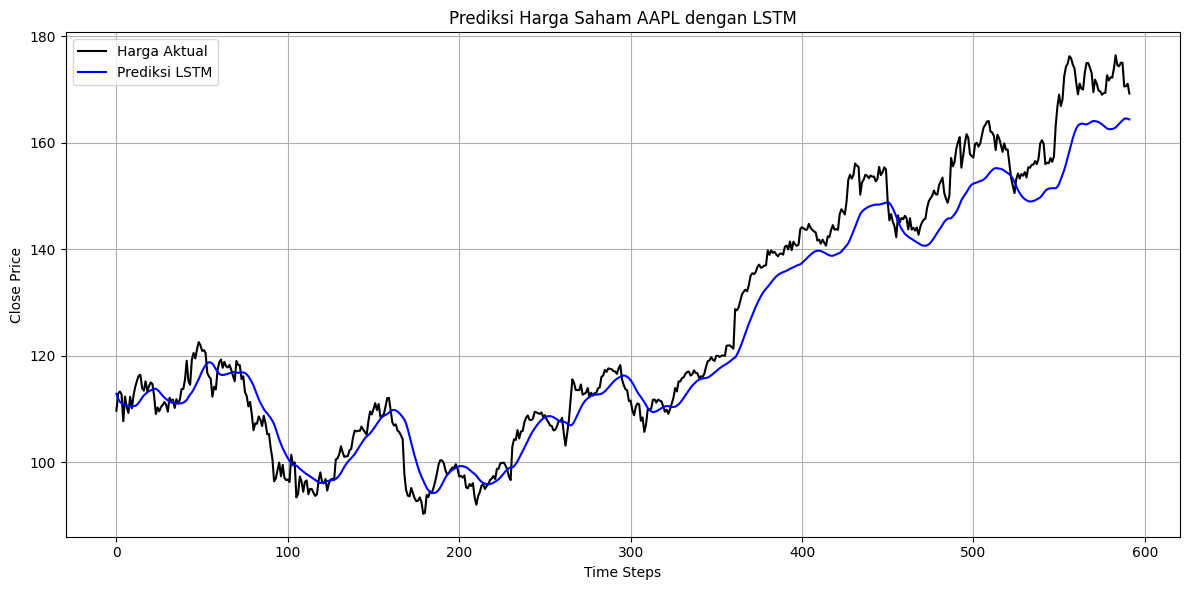

In [55]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Harga Aktual', color='black')
plt.plot(predicted_lstm_prices, label='Prediksi LSTM', color='blue')
plt.title('Prediksi Harga Saham AAPL dengan LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### RNN

In [56]:
model_rnn = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
print("\nTraining RNN Model...")
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Training RNN Model...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0759 - val_loss: 0.0023
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0093 - val_loss: 0.0031
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0028 - val_loss: 6.5617e-04
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0019 - val_loss: 6.4624e-04
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0016 - val_loss: 0.0013


In [58]:
predicted_rnn = model_rnn.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [59]:
predicted_rnn_prices = scaler.inverse_transform(predicted_rnn)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

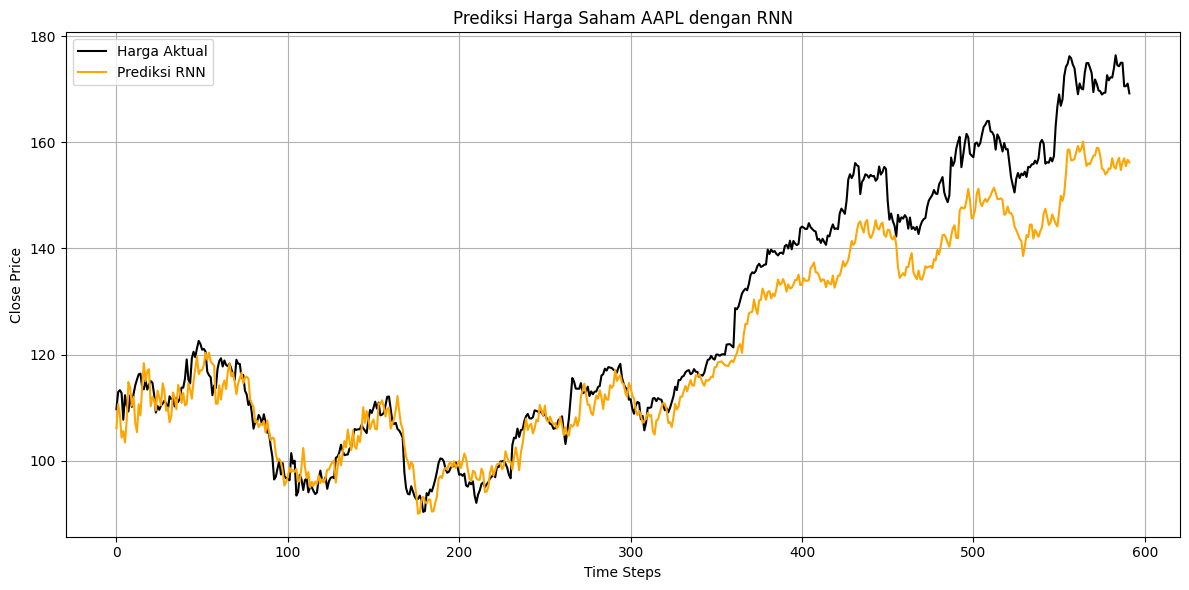

In [60]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Harga Aktual', color='black')
plt.plot(predicted_rnn_prices, label='Prediksi RNN', color='orange')
plt.title('Prediksi Harga Saham AAPL dengan RNN')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()